In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
import glob
import warnings

warnings.filterwarnings('ignore')

sns.set(rc={"figure.dpi":1200})
sns.set_context('notebook')
sns.set_style("ticks")

mpl.style.use('default')

# Update rcParams for global consistency
mpl.rcParams.update({
    'axes.linewidth': 7,           # Line width for axes
    'xtick.major.size': 20,        # Major tick size
    'xtick.major.width': 7,        # Major tick width
    'xtick.minor.size': 10,        # Minor tick size
    'xtick.minor.width': 7,        # Minor tick width
    'ytick.major.size': 20,        # Major tick size
    'ytick.major.width': 7,        # Major tick width
    'ytick.minor.size': 10,        # Minor tick size
    'ytick.minor.width': 7,        # Minor tick width
    'ytick.labelsize': 60,         # Label size for y ticks
    'xtick.labelsize': 60,         # Label size for x ticks
    'font.size': 60,               # Font size for text
    'font.sans-serif': 'Arial',
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Arial',
    'mathtext.it': 'Arial',
    'mathtext.bf': 'Arial:bold',
    'lines.linewidth': 7,          # Line width for all lines
    'scatter.marker': 'o',         # Default marker for scatter
    'lines.markersize': 10,        # Marker size for scatter in points
    'axes.titlesize': 'large',     # Title size
    'axes.labelsize': 'large',     # Label size for axes
    'legend.fontsize': 'large'     # Font size for legends
})


In [14]:
###IMPORT DATAFRAME###
df1 = pd.read_csv('STALLER_MANUSCRIPT_HIF1A_CITED2_MASTER.csv',index_col=0)
df = df1[df1['protein'] != 'CITED2']

#df = df.drop('Unnamed: 0', axis=1)
df

,ID,file_name,area,D,A,D std,A std,D/A,directA,FOV,...,A_corr,D/A_corr,Ef,mut name,Filename,MTBStageAxisX_Position,MTBStageAxisY_Position,Group,well,protein
IDR,,,,,,,,,,,,,,,,,,,,,
1,1,1_7.czi,554.000,1737.395,2376.527,631.392,769.501,0.731065,1227.105,7.czi,...,1222.55770,1.421115,0.413033,NQ>W,1_7.czi,-46686.225,-30820.713,7,7_220407,HIF1A
1,1,1_7.czi,3030.000,1341.820,2134.759,280.026,415.074,0.628558,1100.290,7.czi,...,1214.53930,1.104798,0.475105,NQ>W,1_7.czi,-46686.225,-30820.713,7,7_220407,HIF1A
1,1,1_7.czi,7780.000,2503.252,4083.738,1336.171,2256.587,0.612981,1791.579,7.czi,...,2416.61443,1.035851,0.491195,NQ>W,1_7.czi,-46686.225,-30820.713,7,7_220407,HIF1A
1,1,1_7.czi,1175.000,1501.228,2126.553,377.458,546.483,0.705944,1310.679,7.czi,...,1081.87315,1.387619,0.418827,NQ>W,1_7.czi,-46686.225,-30820.713,7,7_220407,HIF1A
1,1,1_7.czi,967.000,1836.985,2441.447,578.133,733.946,0.752416,1410.536,7.czi,...,1199.84311,1.531021,0.395097,NQ>W,1_7.czi,-46686.225,-30820.713,7,7_220407,HIF1A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,5,5_4.czi,312.228,993.135,1606.837,83.900,193.002,0.618068,937.824,4.czi,...,902.28889,1.100684,0.476035,RK>D,5_4.czi,-62043.762,-50309.455,8,8_220906,HIF1A
5,5,5_4.czi,464.433,1908.640,2761.504,671.180,987.865,0.691160,1805.793,4.czi,...,1406.82413,1.356701,0.424322,RK>D,5_4.czi,-62043.762,-50309.455,8,8_220906,HIF1A
5,5,5_4.czi,370.533,2992.322,4339.262,1065.272,1696.129,0.689592,2891.941,4.czi,...,2203.86255,1.357763,0.424131,RK>D,5_4.czi,-62043.762,-50309.455,8,8_220906,HIF1A


In [17]:
###FILTERS
# df_filtered = df[(df['D std']<4000)]
# df_filtered = df_filtered[(df_filtered['A std']<4000)]
df = df[(df['area']<10000)]
df = df[(df['log directA']>3.1)]
df = df[(df['log directA']<3.9)]
###KEEP ONLY CONSTRUCTS WITH more than 30 cells per well 
# Group by 'ID' and get 'well' value counts for each group
grouped_well_counts = df.groupby('ID')['well'].value_counts()

# Convert the Series to a DataFrame for easier filtering
grouped_well_counts = grouped_well_counts.reset_index(name='count')

# Identify 'ID' and 'well' pairs with a count of 30 or more
valid_wells = grouped_well_counts[grouped_well_counts['count'] >= 30]

# Merge the valid_wells DataFrame back with the original df to filter it
# Only keep rows from df that have 'ID' and 'well' combinations appearing in valid_wells
df_filtered = df.merge(valid_wells[['ID', 'well']], on=['ID', 'well'])

# The df_filtered now contains only the rows from the original df where the 'well' count per 'ID' is 30 or more
print(df_filtered)
df=df_filtered

      ID file_name      area         D         A     D std     A std  \
0      1   1_7.czi  7780.000  2503.252  4083.738  1336.171  2256.587   
1      1   1_7.czi  1175.000  1501.228  2126.553   377.458   546.483   
2      1   1_7.czi   967.000  1836.985  2441.447   578.133   733.946   
3      1   1_7.czi  1910.000  2162.290  4048.474   629.149  1318.658   
4      1   1_7.czi   206.000  1059.592  2013.005   140.026   313.565   
...   ..       ...       ...       ...       ...       ...       ...   
6470   5   5_4.czi   347.717  1926.109  2535.390   703.611   935.625   
6471   5   5_4.czi  1438.718  5133.365  8027.299  2974.691  4748.836   
6472   5   5_4.czi  1012.521  3904.578  5788.705  1561.739  2394.531   
6473   5   5_4.czi   464.433  1908.640  2761.504   671.180   987.865   
6474   5   5_4.czi   370.533  2992.322  4339.262  1065.272  1696.129   

           D/A   directA    FOV  ...      A_corr  D/A_corr        Ef  \
0     0.612981  1791.579  7.czi  ...  2416.61443  1.035851  0.4

In [18]:
# Calculating the median value for each unique well value for each mut name
stats = df.groupby(['mut name', 'well'])['Ef'].median().reset_index()

# Renaming the median column for clarity
stats.rename(columns={'Ef': 'Median Ef'}, inplace=True)

# Group by 'mut name' and calculate the average and standard deviation of the median 'Ef' values
avg_std_median_ef = stats.groupby('mut name')['Median Ef'].agg(['mean', 'std']).reset_index()

# Renaming the columns for clarity
avg_std_median_ef.rename(columns={'mean': 'Average Median Ef', 'std': 'Std Dev Median Ef'}, inplace=True)

print(avg_std_median_ef)
avg_std_median_ef.to_csv('/Users/eflores500/Documents/STALLER_MANUSCRIPT/FIGURES/Sensitivity vs Ef/HIF1A_avg_std_median_ef.csv', index=False)


  mut name  Average Median Ef  Std Dev Median Ef
0     MA>W           0.553558           0.010212
1     NQ>W           0.534500           0.010224
2     RK>D           0.405904           0.006478
3     RK>E           0.427764           0.006046
4       WT           0.452605           0.005809


In [19]:
# Assuming avg_std_median_ef is already defined
# Create a copy of the DataFrame and modify the 'mut name' column
modified_df = avg_std_median_ef.copy()
modified_df['mut name'] = modified_df['mut name'] + '_HIF1A'

# Define the output path
output_path = '/Users/eflores500/Documents/STALLER_MANUSCRIPT/FIGURES/Sensitivity vs Ef/HIF1A_avg_std_median_ef.csv'

# Save the modified DataFrame to a CSV file
modified_df.to_csv(output_path, index=False)

print(f"Modified DataFrame saved to {output_path}")


Modified DataFrame saved to /Users/eflores500/Documents/STALLER_MANUSCRIPT/FIGURES/Sensitivity vs Ef/HIF1A_avg_std_median_ef.csv


In [20]:
from scipy.stats import ttest_ind_from_stats
# Assuming 'stats' DataFrame contains 'Median Ef' for each 'mut name' and 'well'
# Example stats DataFrame
# Calculate the mean and standard deviation of 'Median Ef' for each 'mut name'
stats_summary = stats.groupby('mut name')['Median Ef'].agg(['mean', 'std'])

# Extracting the mean and std median Ef value for 'WT'
wt_mean, wt_std = stats_summary.loc['WT']

# Initialize a DataFrame to store the results
t_test_results = pd.DataFrame(columns=['mut name', 'p-value', 'asterisk'])

# Perform t-tests comparing the mean Median Ef of each mut name against the WT
for mut_name, row in stats_summary.iterrows():
    if mut_name != 'WT':
        # Extract mean and standard deviation for the current 'mut name'
        mut_mean, mut_std = row

        # Calculate the standard errors
        wt_se = wt_std / np.sqrt(len(stats[stats['mut name'] == 'WT']))
        mut_se = mut_std / np.sqrt(len(stats[stats['mut name'] == mut_name]))

        # T-test
        t_stat, p_value = ttest_ind_from_stats(mut_mean, mut_se, len(stats[stats['mut name'] == mut_name]),
                                               wt_mean, wt_se, len(stats[stats['mut name'] == 'WT']),
                                               equal_var=False)
        
        # Determine the asterisk
        asterisk = ''
        if p_value < 0.0001:
            asterisk = '***'
        elif p_value < 0.001:
            asterisk = '**'
        elif p_value < 0.01:
            asterisk = '*'
        
        # Create a temporary DataFrame with the results
        temp_df = pd.DataFrame({'mut name': [mut_name], 'p-value': [p_value], 'asterisk': [asterisk]})
        
        # Concatenate the result to the main DataFrame
        t_test_results = pd.concat([t_test_results, temp_df], ignore_index=True)

t_test_results  # Display the first few rows of the results DataFrame

,mut name,p-value,asterisk
0,MA>W,1.297851e-09,***
1,NQ>W,1.803537e-19,***
2,RK>D,6.276877e-19,***
3,RK>E,1.043418e-16,***


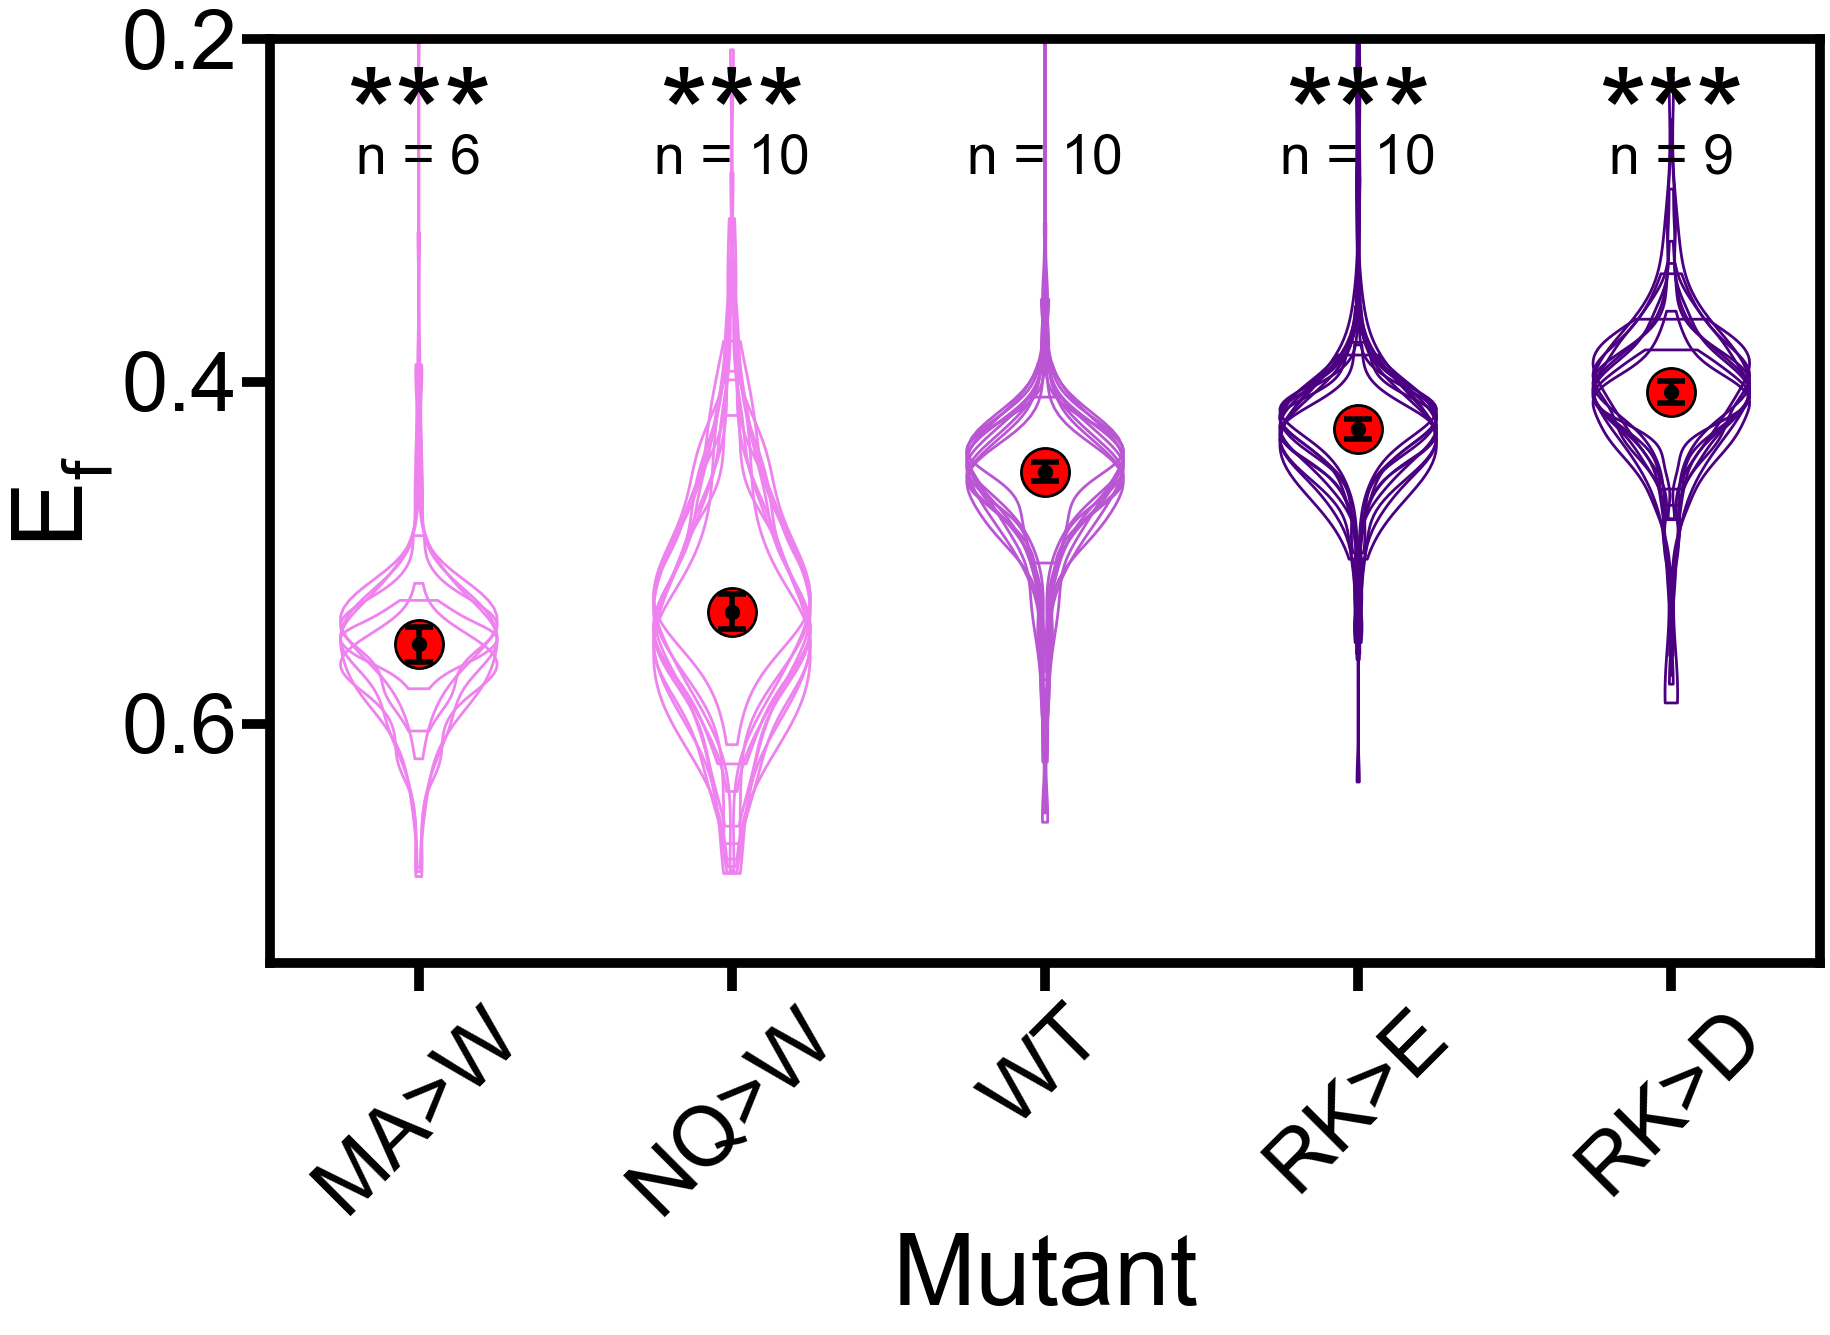

In [21]:
# Unique mutation names
mut_names = ['MA>W', 'NQ>W'] + [mut for mut in df['mut name'].unique() if mut not in ['MA>W', 'NQ>W']]

# Unique well values
well_values = df['well'].unique()

# Create a figure instance and adjust the size
fig, ax = plt.subplots(figsize=(20, 12))

# Color mapping based on mut name
color_mapping = {
    'NQ>W': 'violet',
    'MA>W': 'violet',
    'WT': 'mediumorchid',
    'RK>E': 'indigo',
    'RK>D': 'indigo'
}

# Iterate over each mutation name for violin plots
for i, mut in enumerate(mut_names):
    # For each mutation, iterate over each well value
    for well in well_values:
        # Filter data for each mutation and well
        data = df[(df['mut name'] == mut) & (df['well'] == well)]['Ef']
        # Check if data is not empty
        if not data.empty:
            # Plot a violin plot for each well at the appropriate x-location
            parts = ax.violinplot(data, positions=[i + 1], showmeans=False, showmedians=False, showextrema=False)

            # Set violin properties for transparent fill and outline
            color = color_mapping.get(mut, 'purple')  # Default color is 'purple'
            for pc in parts['bodies']:
                pc.set_facecolor('none')  # Transparent fill
                pc.set_edgecolor(color)  # Outline color
                pc.set_alpha(1)  # Adjust alpha for transparency of the outline, if needed
                pc.set_linewidth(2)
    # Count the total number of unique 'well' values for each mut name
    total_well_count = df[df['mut name'] == mut]['well'].nunique()
    # Plot the count on each violin
    ax.text(i + 1, 0.27, f"n = {total_well_count}", ha='center', va='center', color='black', fontsize=40)

# Overlay scatter plot of Average Median Ef values
for i, mut in enumerate(mut_names):
    # Check if the mutation name is in avg_std_median_ef DataFrame
    if mut in avg_std_median_ef['mut name'].values:
        avg_ef = avg_std_median_ef[avg_std_median_ef['mut name'] == mut]['Average Median Ef'].iloc[0]
        ax.scatter(i + 1, avg_ef, color='red', s=1200, edgecolor='black', linewidth=2)
    # Overlay scatter plot of Average Median Ef values with error bars
    if mut in avg_std_median_ef['mut name'].values:
        std_dev = avg_std_median_ef.loc[avg_std_median_ef['mut name'] == mut, 'Std Dev Median Ef'].iloc[0]
        ax.errorbar(i + 1, avg_ef, yerr=std_dev, fmt='o', color='black', capsize=10, linewidth=4, capthick=4, ecolor='black',zorder=4)

    # Overlay asterisks from t-test results
    if mut in t_test_results['mut name'].values:
        asterisk = t_test_results[t_test_results['mut name'] == mut]['asterisk'].iloc[0]
        # Adjusting the y-position to plot the asterisk at the top
        ax.text(i + 1, 0.25, asterisk, ha='center', va='center', color='black', fontsize=90)

# Set the x-ticks to correspond to the mutation names
ax.set_xticks(np.arange(1, len(mut_names) + 1))
ax.set_xticklabels(mut_names, rotation=45)

# Set the limits for the y-axis
ax.set_ylim([0.74, 0.2])

# Adding labels and title
plt.xlabel('Mutant')
plt.ylabel('E$_{f}$')
fig.savefig('/Users/eflores500/Documents/STALLER_MANUSCRIPT/FIGURES/SVG_FILES/HIF1A_VIOLINS.svg')
plt.show()


In [22]:
# Group by 'mut name' and count the number of wells and total rows
df['Total Cells'] = df.groupby('mut name')['well'].transform('count')


In [23]:
def calculate_counts(df):
    # Group by 'mut name', 'condition', and 'IDR' and count the unique wells
    counts = df.groupby(['mut name'])['well'].nunique().reset_index(name='Well Count')
    
    # Calculate the total number of rows for each 'mut name', 'condition', and 'IDR' and add it as a new column 'Total Cells'
    counts['Total Cells'] = df.groupby(['mut name']).size().values
    
    return counts

# Example usage:
counts_df = calculate_counts(df)
print(counts_df)


  mut name  Well Count  Total Cells
0     MA>W           6          697
1     NQ>W          10         1143
2     RK>D           9         1159
3     RK>E          10         1494
4       WT          10         1982
